<a href="https://colab.research.google.com/github/Bharadwaj9429/Data-analytics-projects/blob/main/calculating%20outstanding%20fee%20due.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the Excel file from your computer
uploaded = files.upload()


Saving Interview_fee_comparision.xlsx to Interview_fee_comparision.xlsx



📊 Fee Summary:

   Academic Year     Total Fee  Collected Fee  Outstanding Fee
0           2024  3.181275e+09   3.143298e+09     3.797719e+07
1           2025  3.666063e+09   1.856482e+09     1.809581e+09


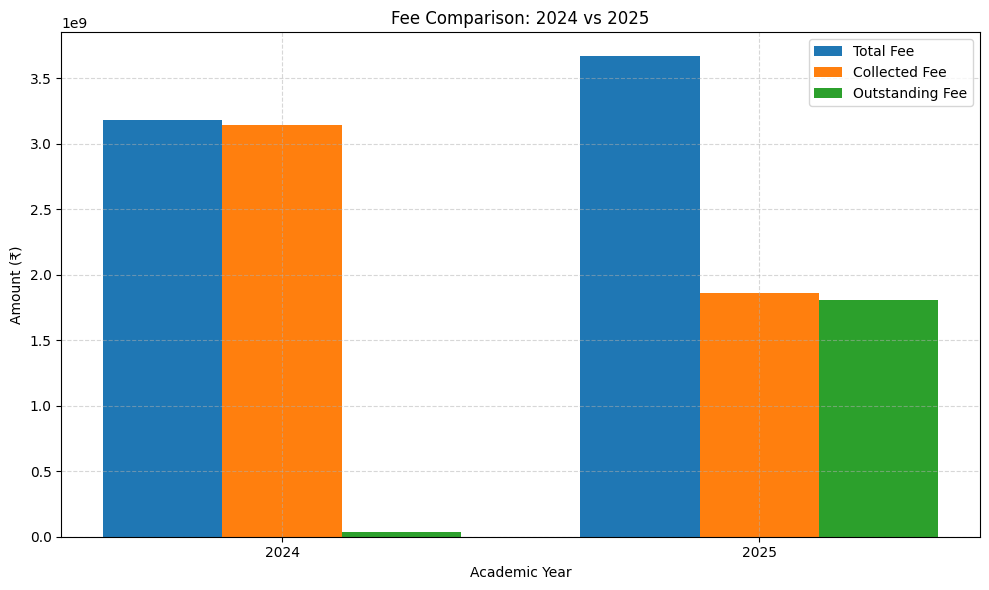

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded file (get the exact filename)
file_path = "Interview_fee_comparision.xlsx"

# Load the sheets
collection_df = pd.read_excel(file_path, sheet_name="Collection")
fee_df = pd.read_excel(file_path, sheet_name="Actual_Fee")

# Convert dates
collection_df["created_date"] = pd.to_datetime(collection_df["created_date"])

# Analyze for AY 2024 and 2025
academic_years = [2024, 2025]
results = {
    "Academic Year": [],
    "Total Fee": [],
    "Collected Fee": [],
    "Outstanding Fee": []
}

for year in academic_years:
    total_fee = fee_df[fee_df["academic_year_id"] == year]["net_amount"].sum()
    collected_fee = collection_df[collection_df["academic_year_id"] == year]["net_amount_paid"].sum()
    outstanding_fee = total_fee - collected_fee

    results["Academic Year"].append(year)
    results["Total Fee"].append(total_fee)
    results["Collected Fee"].append(collected_fee)
    results["Outstanding Fee"].append(outstanding_fee)

# Summary table
summary_df = pd.DataFrame(results)
print("\n📊 Fee Summary:\n")
print(summary_df)

# Plot
plt.figure(figsize=(10, 6))
x = summary_df["Academic Year"].astype(str)
x_index = range(len(x))
bar_width = 0.25

plt.bar([i - bar_width for i in x_index], summary_df["Total Fee"], width=bar_width, label="Total Fee")
plt.bar(x_index, summary_df["Collected Fee"], width=bar_width, label="Collected Fee")
plt.bar([i + bar_width for i in x_index], summary_df["Outstanding Fee"], width=bar_width, label="Outstanding Fee")

plt.xlabel("Academic Year")
plt.ylabel("Amount (₹)")
plt.title("Fee Comparison: 2024 vs 2025")
plt.xticks(ticks=x_index, labels=x)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



📊 Fee Summary Table:

 Academic Year         Total Fee     Collected Fee   Outstanding Fee Outstanding %
          2024 ₹3,181,274,758.92 ₹3,143,297,564.02    ₹37,977,194.90         1.19%
          2025 ₹3,666,063,223.03 ₹1,856,481,885.91 ₹1,809,581,337.12        49.36%


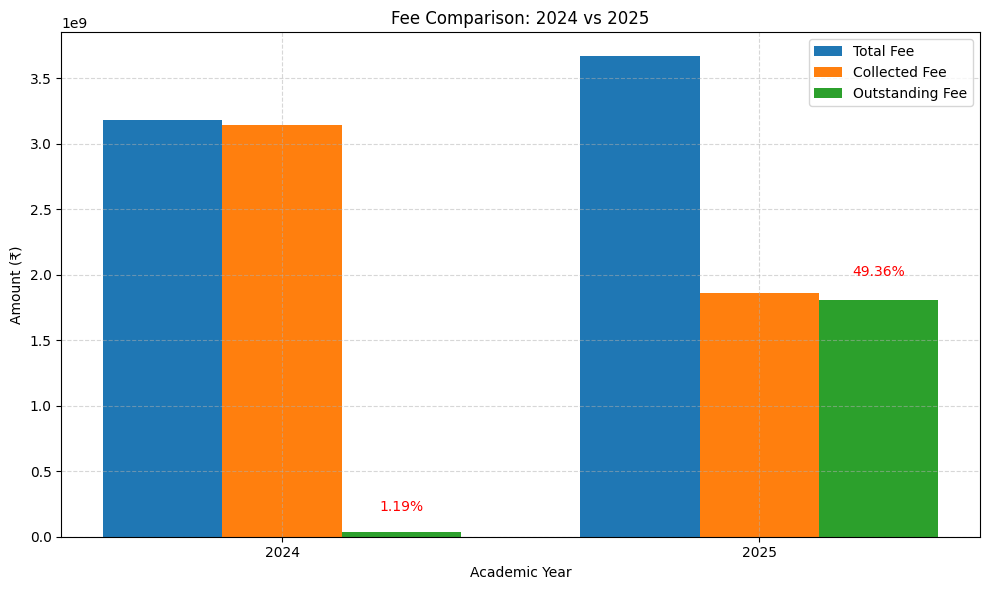

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# File name (uploaded manually)
file_path = "Interview_fee_comparision.xlsx"

# Load sheets
collection_df = pd.read_excel(file_path, sheet_name="Collection")
fee_df = pd.read_excel(file_path, sheet_name="Actual_Fee")

# Ensure date format
collection_df["created_date"] = pd.to_datetime(collection_df["created_date"])

# Process academic years
academic_years = [2024, 2025]
results = {
    "Academic Year": [],
    "Total Fee": [],
    "Collected Fee": [],
    "Outstanding Fee": [],
    "Outstanding %": []
}

for year in academic_years:
    total_fee = fee_df[fee_df["academic_year_id"] == year]["net_amount"].sum()
    collected_fee = collection_df[collection_df["academic_year_id"] == year]["net_amount_paid"].sum()
    outstanding_fee = total_fee - collected_fee
    outstanding_pct = (outstanding_fee / total_fee) * 100 if total_fee else 0

    results["Academic Year"].append(year)
    results["Total Fee"].append(round(total_fee, 2))
    results["Collected Fee"].append(round(collected_fee, 2))
    results["Outstanding Fee"].append(round(outstanding_fee, 2))
    results["Outstanding %"].append(round(outstanding_pct, 2))

# Create DataFrame
summary_df = pd.DataFrame(results)

# Format numbers with commas for display
display_df = summary_df.copy()
for col in ["Total Fee", "Collected Fee", "Outstanding Fee"]:
    display_df[col] = display_df[col].apply(lambda x: f"₹{x:,.2f}")
display_df["Outstanding %"] = display_df["Outstanding %"].astype(str) + "%"

print("\n📊 Fee Summary Table:\n")
print(display_df.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
x = summary_df["Academic Year"].astype(str)
x_index = range(len(x))
bar_width = 0.25

plt.bar([i - bar_width for i in x_index], summary_df["Total Fee"], width=bar_width, label="Total Fee")
plt.bar(x_index, summary_df["Collected Fee"], width=bar_width, label="Collected Fee")
plt.bar([i + bar_width for i in x_index], summary_df["Outstanding Fee"], width=bar_width, label="Outstanding Fee")

# Add Outstanding % labels above bars
for i, pct in enumerate(summary_df["Outstanding %"]):
    plt.text(i + bar_width, summary_df["Outstanding Fee"][i] + 0.05 * summary_df["Total Fee"][i],
             f"{pct:.2f}%", ha='center', fontsize=10, color='red')

plt.xlabel("Academic Year")
plt.ylabel("Amount (₹)")
plt.title("Fee Comparison: 2024 vs 2025")
plt.xticks(ticks=x_index, labels=x)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
